# DISCRETE PROBABILITY DISTRIBUTIONS

Knowledge of discrete probability distributions is also required in the choice of activation functions in the output layer of deep learning neural networks for classification tasks and selecting an appropriate loss function. Discrete probability distributions play an important role in applied machine learning and there are a few distributions that a practitioner must know about.

A discrete random variable is a random variable that can have one of a finite set of specific outcomes. The two types of discrete random variables most commonly used in machine learning are binary and categorical.

Binary Random Variable: x ϵ {0, 1}

Categorical Random Variable: x ϵ {1, 2, ..., K}

The relationship between the events for a discrete random variable and their probabilities is called the discrete probability distribution and is summarized by a probability mass function, or PMF. 

**PMF, Probability Mass Function:** Returns the probability of a given outcome.

**CDF: Cumulative Distribution Function:** returns the probability of a value less than or equal to a given outcome.

**PPF: Percent-Point Function:** Returns a discrete value that is less than or equal to the given probability.

There are many common discrete probability distributions. 
1. **Binary Random Variable:** Bernoulli Distribution.
2. **Sequence of a Binary Random Variable:** Binomial Distribution.
3. **Categorical Random Variable:** Multinoulli Distribution.
4. **Sequence of a Categorical Random Variable:** Multinomial Distribution.
5. **Poission Distribution**

**In this notebook, generating random data samples, estimating their moments, plotting of pmf and cdf by using histogram will be covered.**

# Bernoulli Distribution
The Bernoulli distribution is a discrete probability distribution that covers a case where an event will have a binary outcome as either a 0 or 1.

                 x ϵ {0, 1}

A Bernoulli trial is an experiment or case where the outcome follows a Bernoulli distribution. The distribution and the trial are named after the Swiss mathematician Jacob Bernoulli. Some common examples of Bernoulli trials include: 
1. The single flip of a coin that may have a heads (0) or a tails (1) outcome.
2. A single birth of either a boy (0) or a girl (1).

# Binomial Distribution

The performance of a machine learning algorithm on a binary classification problem can be analyzed as a Bernoulli process, where the prediction by the model on an example from a test set is a Bernoulli trial (correct or incorrect . The Binomial distribution summarizes the number of successes k in a given number of Bernoulli trials n, with a given probability of success for each trial p. We can demonstrate this with a Bernoulli process where the probability of success is 30% or P(x = 1) = 0:3 and the total number of trials is 100 (k = 100).

We can simulate the Bernoulli process with randomly generated cases and count the number of successes over the given number of trials. This can be achieved via the binomial() NumPy function. This function takes the total number of trials and probability of success as arguments and returns the number of successful outcomes across the trials for one simulation.

We can calculate the moments of this distribution, specifically the expected value or mean and the variance using the binom.stats() SciPy function.

In [ ]:
import numpy as np
from numpy import random
from numpy.random import binomial
from numpy.random import multinomial
from numpy.random import poisson
from scipy.stats import binom
from scipy.stats import multinomial
from scipy.stats import poisson
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
# settings for seaborn plotting style
sns.set(color_codes=True)

In [ ]:
# example of simulating a binomial process and counting success

# define the parameters of the distribution
p = 0.7
n = 1000
# run a single simulation
success = binomial(n, p)
print('Total Success: %d' % success)

Total Success: 687


We can calculate the moments of this distribution, specifically the expected value or mean and the variance using the binom.stats() SciPy function.

In [ ]:
# calculate moments of a binomial distribution
# define the parameters of the distribution
p = 0.7
n = 1000
# calculate moments
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')
print('Mean=%.3f, Variance=%.3f, skew=%.3f, kurt=%.3f' % (mean, var, skew, kurt))

Mean=700.000, Variance=210.000, skew=-0.028, kurt=-0.001


Mean=70.000, Variance=21.000, skew=-0.087, kurt=-0.012


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Binomial Distribution')]

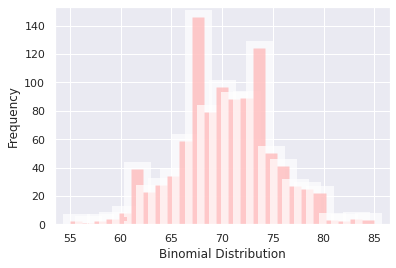

In [ ]:
# example to generate random variates for the binomial distribution

#generate an array of 1000 values that follow a binomial distribution. Each number in the resulting array represents the number of “successes” 
#experienced during 100 trials where the probability of the distribution is 0.7

data_binom = binom.rvs(n=100, p=0.7, size=1000)
#print('The array of binomial numbers are : \n', data_binom)

# To calculate the moments of the distribution
mean, var, skew, kurt = binom.stats(n=100, p=0.7, moments='mvsk')
print('Mean=%.3f, Variance=%.3f, skew=%.3f, kurt=%.3f' % (mean, var, skew, kurt))

# To display the histogram of the distribution
ax = sns.distplot(data_binom,
                  kde=False,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':0.7})
ax.set(xlabel='Binomial Distribution', ylabel='Frequency')


We can use the probability mass function to calculate the likelihood of different numbers of successful outcomes for a sequence of trials

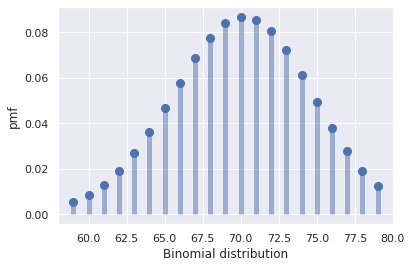

In [ ]:
# example of using the pmf for the binomial distribution
# define the parameters of the distribution
p = 0.7
n = 100

#PMF plotting using histogram
x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))
plt.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
plt.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
plt.xlabel('Binomial distribution')
plt.ylabel('pmf')
plt.show()

Text(0, 0.5, 'cdf')

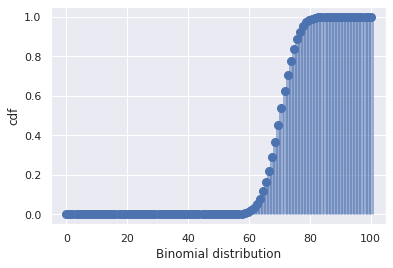

In [ ]:
# example of using the cdf for the binomial distribution

# define the parameters of the distribution
p = 0.7
n = 100

#CDF plotting using histogram
x = np.linspace(0, 100, 100)
plt.plot(x, stats.binom.cdf(x, n, p), 'bo', ms=8, label='binom cdf')
plt.vlines(x, 0, binom.cdf(x, n, p), colors='b', lw=5, alpha=0.5)
plt.xlabel('Binomial distribution')
plt.ylabel('cdf')


# MULTINOULLI DISTRIBUTION

The Multinoulli distribution, also called the categorical distribution, covers the case where an event will have one of K possible outcomes.

                    x ϵ { 1, 2, 3, ... , K}

It is a generalization of the Bernoulli distribution from a binary variable to a categorical variable, where the number of cases K for the Bernoulli distribution is set to 2, K = 2. A common example that follows a Multinoulli distribution is:
1. A single roll of a die that will have an outcome in {1; 2; 3; 4; 5; 6}, e.g. K = 6.

# MULTINOMIAL DISTRIBUTION
The repetition of multiple independent Multinoulli trials will follow a multinomial distribution. The multinomial distribution is a generalization of the binomial distribution for a discrete variable with K outcomes.
A multinomial distribution is summarized by a discrete random variable with K outcomes, a probability for each outcome from p1 to pK, and n successive trials.

We can demonstrate this with a small example with 3 categories (K = 3) with equal probability (p=33.33%) and 100 trials.

In [ ]:
# example of simulating a multinomial process
from numpy.random import multinomial
# define the parameters of the distribution
p = [1.0/3.0, 1.0/3.0, 1.0/3.0]
k = 100
# run a single simulation
cases = multinomial(k, p)
# summarize cases
for i in range(len(cases)):
  print('Case %d: %d' % (i+1, cases[i]))

Case 1: 48
Case 2: 21
Case 3: 31


We might expect the idealized case of 100 trials to result in 33, 33, and 34 cases for events 1, 2 and 3 respectively. We can calculate the probability of this specific combination occurring in practice using the probability mass function or multinomial.pmf() SciPy function.

In [ ]:
# calculate the probability for a given number of events of each type
from scipy.stats import multinomial
# define the parameters of the distribution
p = [1.0/3.0, 1.0/3.0, 1.0/3.0]
k = 100
# define the distribution
dist = multinomial(k, p)
# define a specific number of outcomes from 100 trials
cases = [33, 33, 34]
# calculate the probability for the case
pr = dist.pmf(cases)
# print as a percentage
print('Case=%s, Probability: %.3f%%' % (cases, pr*100))

Case=[33, 33, 34], Probability: 0.813%


In [ ]:
# calculate the probability for a given number of events of each type
from scipy.stats import multinomial
# define the parameters of the distribution
p = [1.0/3.0, 1.0/3.0, 1.0/3.0]
k = 100
# define the distribution
dist = multinomial(k, p)

# calculate the entropy for the cases
pr = dist.entropy()
print('Entropy: %.3f' % (pr))

Entropy: 5.793


# POISSION DISTRIBUTION

Poisson random variable is typically used to model the number of times an event  happened in a time interval. For example, the number of users visited on a website in an interval can be thought of a Poisson process. Poisson distribution is described in terms of the rate (μ) at which the events happen. An event can occur 0, 1, 2, … times in an interval. The average number of events in an interval is designated λ (lambda). Lambda is the event rate, also called the rate parameter. The probability of observing k events in an interval is given by the equation:

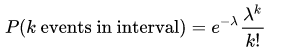

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean=4.000, Variance=4.000, skew=0.500, kurt=0.250


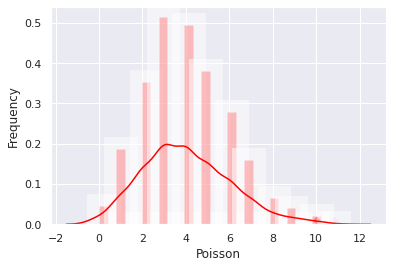

In [ ]:
# GENERATION OF POISSON DISTRIBUTION

from scipy.stats import poisson
import seaborn as sb

data_poission = poisson.rvs(mu=4, size=1000)
ax = sns.distplot(data_poission,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 25,'alpha':0.5})
ax.set(xlabel='Poisson', ylabel='Frequency')

# CALCULATION OF MOMENTS OF POISSION DISTRIBUTION
mean, var, skew, kurt = poisson.stats(mu=4, moments='mvsk')
print('Mean=%.3f, Variance=%.3f, skew=%.3f, kurt=%.3f' % (mean, var, skew, kurt))

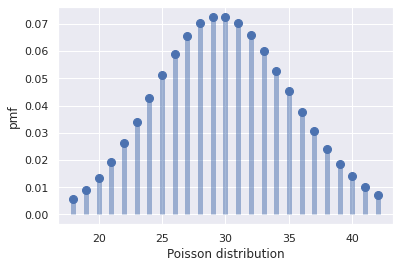

In [ ]:
# CALCULATION OF PMF OF POISSION DISTRIBUTION

mu = 30
#PMF plotting using histogram
x = np.arange(poisson.ppf(0.01, mu), poisson.ppf(0.99, mu))
plt.plot(x, poisson.pmf(x, mu) , 'bo', ms=8, label='poisson pmf')
plt.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
plt.xlabel('Poisson distribution')
plt.ylabel('pmf')
plt.show()

# ANOTHER WAY OF CREATING PMF DISTRIBUITON FOR POISSON DISTRIBUTION

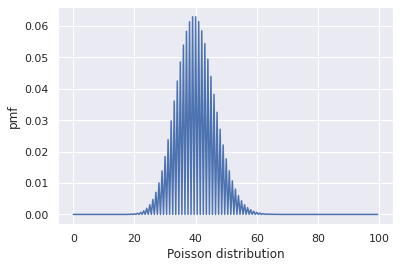

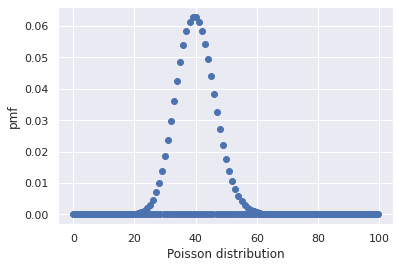

In [ ]:
# creating a numpy array for x-axis
x = np.arange(0, 100, 0.5)

# poisson distribution data for y-axis
y = poisson.pmf(x, mu=40)

# plotting the graph
plt.plot(x, y)
plt.xlabel('Poisson distribution')
plt.ylabel('pmf')

# showing the graph
plt.show()

#scatter plot
plt.scatter(x, y)
plt.xlabel('Poisson distribution')
plt.ylabel('pmf')

# showing the graph
plt.show()


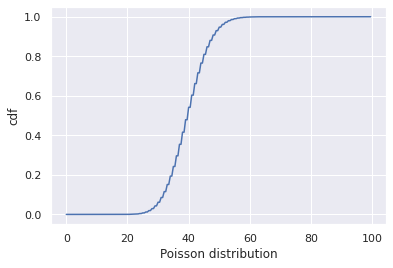

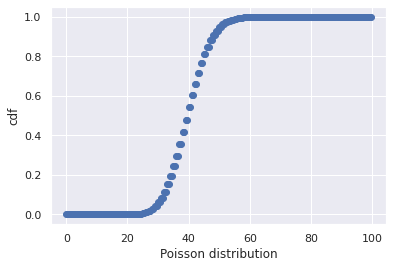

In [ ]:
# CALCULATION OF CDF OF POISSION DISTRIBUTION
# creating a numpy array for x-axis
x = np.arange(0, 100, 0.5)

# poisson distribution data for y-axis
y = poisson.cdf(x, mu=40)

# plotting the graph
plt.plot(x, y)
plt.xlabel('Poisson distribution')
plt.ylabel('cdf')

# showing the graph
plt.show()

#scatter plot
plt.scatter(x, y)
plt.xlabel('Poisson distribution')
plt.ylabel('cdf')

# showing the graph
plt.show()
